In [1]:
## given parse object (.pickel) get all reversed parses too

%load_ext autoreload
%autoreload 2

from analysis.utils import *
from analysis.parse import *
from analysis.analy import *

EXPT = "S12.10"
DAT = loadCheckpoint(EXPT, userealnames=True, loadparse=True, suppressPrint=True, loadbehavior=False)

# load datflat and datseg



HERE
GGGGdd
GGGGeee
DRAW TASK training set: S12
DO SHAPING: False
training task names:
['S12_13_shaping_0', 'S12_13_shaping_1', 'S12_13_shaping_2', 'S12_13_shaping_3', 'S12_13_shaping_4', 'S12_13_shaping_5', 'S12_13_shaping_6', 'S12_13_shaping_7', 'S12_13_shaping_8', 'S12_13_shaping_9', 'S12_13_shaping_10', 'S12_1', 'S12_5', 'S12_8', 'S12_10', 'S12_32', 'S12_34', 'S12_38', 'S12_20', 'S12_39', 'S12_57', 'S12_79', 'S12_113', 'S12_124', 'S12_126', 'S12_133', 'S12_147', 'S12_155', 'S12_163', 'S12_200', 'S12_214', 'S12_31', 'S12_52', 'S12_55', 'S12_70', 'S12_129', 'S12_139', 'S12_141', 'S12_148', 'S12_207', 'S12_222', 'S12_224', 'S12_229', 'S12_233', 'S12_235', 'S12_243', 'S12_246']
test tasks:
['S12_13_test_1', 'S12_13_test_2', 'S12_13_test_4', 'S12_13_test_5', 'S12_13_test_6', 'S12_13_test_7', 'S12_13_test_8', 'S12_13_test_9', 'S12_13_test_10', 'S12_13_test_11', 'S12_13_test_12', 'S12_132', 'S12_201', 'S12_220', 'S12_247', 'S13_182', 'S13_217', 'S13_219']
FOUND 65 pre-computed parses!
Num

In [15]:
DAT["parses"][0]["parse"][1]
DAT["parses"][10]

{'name': 'S12_139', 'parse': [[array([[-1.75, -2.  ],
          [-1.75,  2.  ]]), array([[-0.65, -2.  ],
          [-0.65,  2.  ]]), array([[ 0.45, -2.  ],
          [ 0.45,  2.  ]]), array([[ 1.55, -2.  ],
          [ 1.55,  2.  ]]), array([[-2.25,  1.  ],
          [-1.25,  1.  ]]), array([[-1.25000000e+00,  0.00000000e+00],
          [-1.26168972e+00,  1.07485220e-01],
          [-1.29621229e+00,  2.09944551e-01],
          [-1.35195347e+00,  3.02587108e-01],
          [-1.42630686e+00,  3.81081028e-01],
          [-1.51579578e+00,  4.41756022e-01],
          [-1.61623583e+00,  4.81774996e-01],
          [-1.72293055e+00,  4.99266707e-01],
          [-1.83089100e+00,  4.93413261e-01],
          [-1.93506908e+00,  4.64488360e-01],
          [-2.03059353e+00,  4.13844499e-01],
          [-2.11299775e+00,  3.43849729e-01],
          [-2.17842859e+00,  2.57776929e-01],
          [-2.22382659e+00,  1.59650765e-01],
          [-2.24706898e+00,  5.40595092e-02],
          [-2.24706898e+00,

In [2]:
stim = "S12_139"
datflat = DATloadDatFlat(DAT, stim)
datseg = DATloadDatSeg(DAT, stim)



In [40]:
assert len(datflat)==len(datseg), "assuming they are perfectly matched"
sequencelist = [[d["codes_unique"] for d in dseg] for dseg in datseg]

# convert to strings
# sequencelist_reverse = ["_".join(s[::-1]) for s in sequencelist]
# sequencelist = ["_".join(s) for s in sequencelist]

In [39]:
assert len(list(set([d["codes_unique"] for dseg in datseg for d in dseg])))==len([d["codes_unique"] for d in datseg[0]]), "i expected all permutations to have exact same tokens, just in different order. must be error in extracting after parsing?"

FAILED TO LOAD STIM .png file...


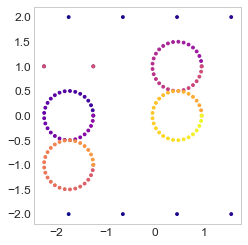

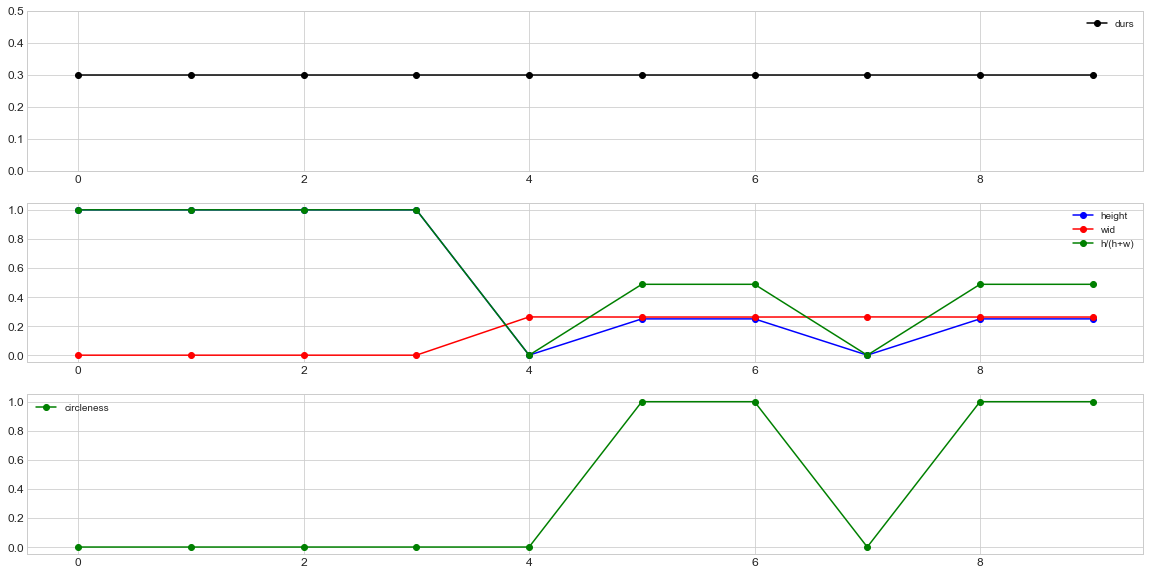

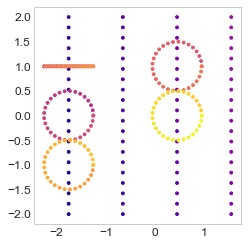

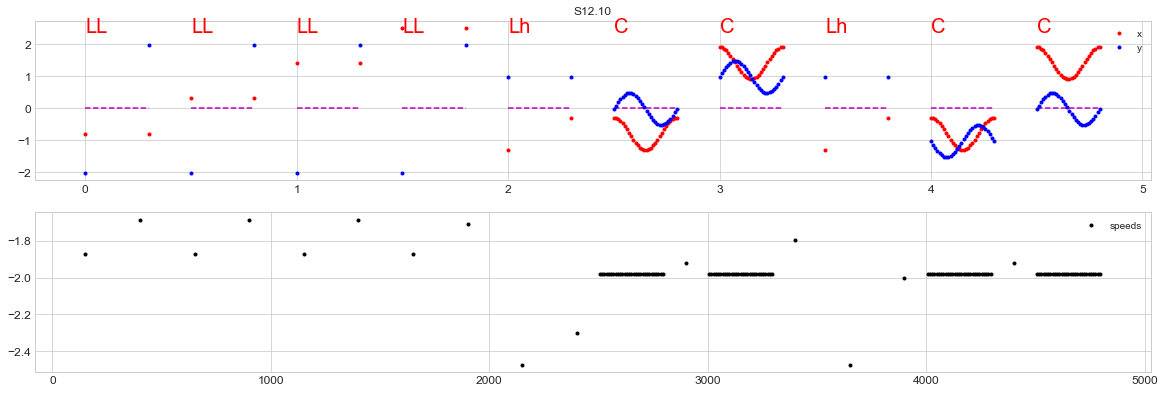

In [55]:
from analysis.importDrawgood import *
dgutils.plotDrawing(datflat[0])
dgseg.plotDrawingAndTimecourse(datflat[0])

In [56]:
len(datseg[0])

10

In [6]:
def getFwRevSeqStrings(seq):
    """seq is list of strings. will output one long strong for fw and rev.
    confirmed that they ware mirror image (i.e. reverses tokens too)"""
    
    # get fw
    seqfw = "_".join(seq)
    
    # get rev
    tmp = seq
#     tmp = [s[::-1] for s in seq] # flip each token
    tmp = tmp[::-1]
    seqrev = "_".join(tmp)

    return seqfw, seqrev
    
sequences_fw = []
sequences_rev = []
for seq in sequencelist:
    
    f, r = getFwRevSeqStrings(seq)
    sequences_fw.append(f)
    sequences_rev.append(r)
    

In [7]:
print(sequences_fw[0])
print(sequences_rev[-1])


LL00_LL10_LL20_LL30_Lh00_C00_C20_Lh01_C01_C21
C20_Lh01_C01_C21_C00_Lh00_LL30_LL20_LL10_LL00


In [30]:
sequences_to_add[0].split("_")

['Lh01', 'C21', 'C01', 'C20', 'LL00', 'LL10', 'LL20', 'LL30', 'Lh00', 'C00']

In [48]:
sequencelist = [[d["codes_unique"] for d in dseg] for dseg in datseg]

sequences_fw = []
sequences_rev = []
for seq in sequencelist:
    
    f, r = getFwRevSeqStrings(seq)
    sequences_fw.append(f)
    sequences_rev.append(r)

# get all unique sequences
sequences_fw.extend(sequences_rev)
sequences_all = set(sequences_fw)
sequences_to_add = []
for seq in sequences_all:
    
    # -- check thru all datsgs for this sequence
    found=False
    for df, ds in zip(datflat, datseg):
        
        # get sequence
        fw = getFwRevSeqStrings([d["codes_unique"] for d in ds])[0]
        if seq==fw:
            found=True
            break
    if not found:
        # then add this sequence:
        sequences_to_add.append(seq)


# -- get dictionayr that can use to recompose new sequence
seqdict = {}
for ds in datseg[0]:
    seqdict[ds["codes_unique"]]=ds
        

for seq in sequences_to_add:
    # get list of tokens
    seqlist = seq.split("_")
    
    dsegthis = [seqdict[scode] for scode in seqlist]
    datseg.append(dsegthis)

# TO DO:
# SAVE THE DATSEG BACK.


In [45]:
len(datseg[0])

10

In [38]:
seqdict.keys()

dict_keys(['LL00', 'LL10', 'LL20', 'LL30', 'Lh00', 'C00', 'C20'])